In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load the Coca-Cola stock data
stock_data = pd.read_csv('https://raw.githubusercontent.com/Tirth678/Data-Analysis-Projects/refs/heads/main/Coco%20Cola/Data/Coca-Cola_stock_info.csv')

# Check for missing values
missing_values = stock_data.isnull().sum()

# Handle missing values using forward fill
stock_data.fillna(method='ffill', inplace=True)

# Remove unnecessary rows if any (assuming we want to drop rows with all NaN values)
stock_data.dropna(how='all', inplace=True)

# Display the cleaned data
print(stock_data.head())


                   Key                                              Value
0                  zip                                              30313
1               sector                                 Consumer Defensive
2    fullTimeEmployees                                              80300
3  longBusinessSummary  The Coca-Cola Company, a beverage company, man...
4                 city                                            Atlanta


/var/folders/s3/cvr5v5fn2lj0g39xwwzgpx_m0000gn/T/ipykernel_3798/487642610.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)


In [13]:
# First make sure yfinance is installed:
# !pip install yfinance

import yfinance as yf

# Fetch Coca-Cola stock data
try:
    ticker = 'KO'
    data = yf.download(ticker, start='2015-01-01', end='2023-12-31')
    data.reset_index(inplace=True)
    print(data.head())
except Exception as e:
    print(f"Error occurred: {e}")
    print("Please make sure yfinance is installed using: pip install yfinance")


[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
0      2015-01-02  30.662111  30.851295  30.414719  30.749425   9921100
1      2015-01-05  30.662111  31.266041  30.618456  31.062304  26292600
2      2015-01-06  30.894958  31.244218  30.734883  30.858578  16897500
3      2015-01-07  31.280605  31.367920  30.982279  31.142355  13412300
4      2015-01-08  31.658957  31.702615  31.360630  31.418842  21743600


In [14]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values
data.fillna(method='ffill', inplace=True)
data.fillna(0, inplace=True)  # Replace remaining missing values with 0

# Check data types
print(data.dtypes)


Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64
Price   Ticker
Date              datetime64[ns]
Close   KO               float64
High    KO               float64
Low     KO               float64
Open    KO               float64
Volume  KO                 int64
dtype: object


/var/folders/s3/cvr5v5fn2lj0g39xwwzgpx_m0000gn/T/ipykernel_3798/74300358.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [15]:
# Add Moving Averages
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Add Daily Returns
data['Daily_Return'] = data['Close'].pct_change()

# Add Volatility
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()

# Drop rows with NA due to rolling calculations
data.dropna(inplace=True)


In [16]:
print(data.describe())


Price                            Date        Close         High          Low  \
Ticker                                          KO           KO           KO   
count                            2215  2215.000000  2215.000000  2215.000000   
mean    2019-08-06 07:49:22.889390592    42.987010    43.282485    42.686535   
min               2015-03-16 00:00:00    28.101782    28.494473    27.043989   
25%               2017-05-24 12:00:00    34.694351    34.913756    34.470567   
50%               2019-08-07 00:00:00    40.891731    41.240378    40.536940   
75%               2021-10-16 12:00:00    50.886599    51.205597    50.619400   
max               2023-12-29 00:00:00    60.956146    61.867593    60.722541   
std                               NaN     9.549088     9.626279     9.465687   

Price          Open        Volume        MA_20        MA_50 Daily_Return  \
Ticker           KO            KO                                          
count   2215.000000  2.215000e+03  2215.000000 

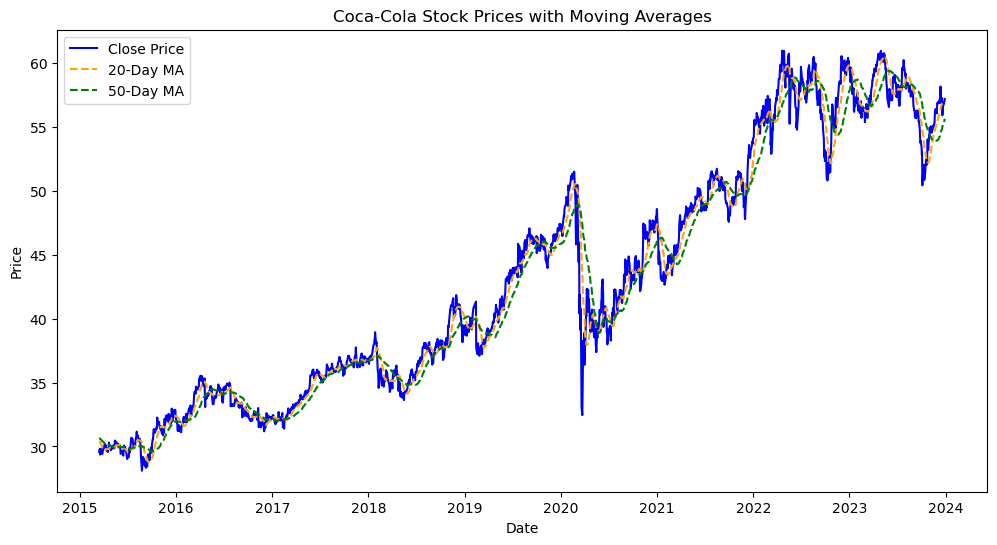

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['MA_20'], label='20-Day MA', linestyle='--', color='orange')
plt.plot(data['Date'], data['MA_50'], label='50-Day MA', linestyle='--', color='green')
plt.title('Coca-Cola Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


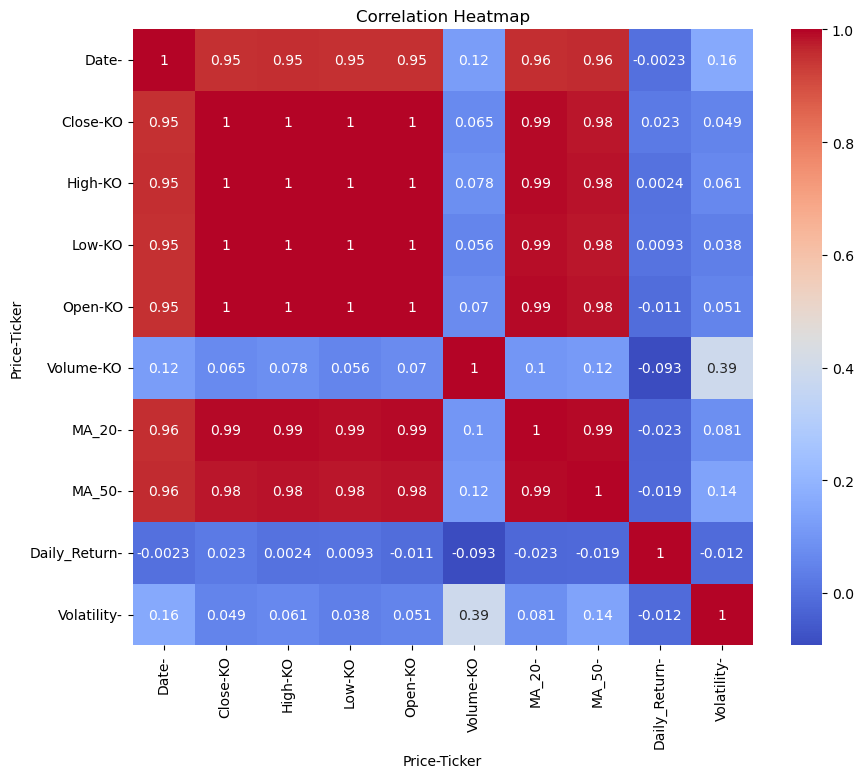

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [30]:
# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the month and year
data['YearMonth'] = data['Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate the total volume
monthly_volume = data.groupby('YearMonth')['Volume'].sum().reset_index()

# Convert 'YearMonth' back to a datetime format for plotting
monthly_volume['YearMonth'] = monthly_volume['YearMonth'].dt.to_timestamp()


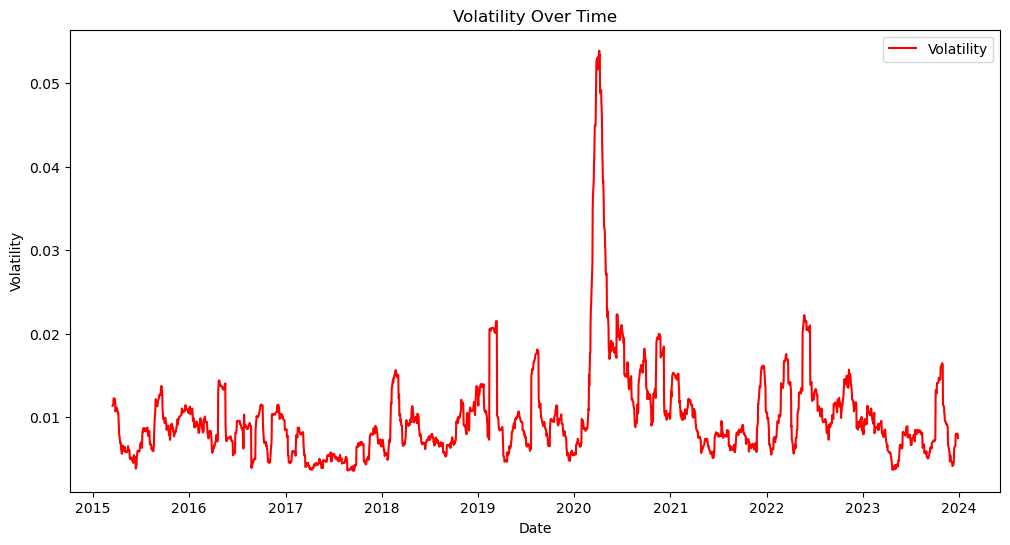

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volatility'], color='red', label='Volatility')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


In [27]:
data.to_csv('cleaned_coca_cola_stock.csv', index=False)


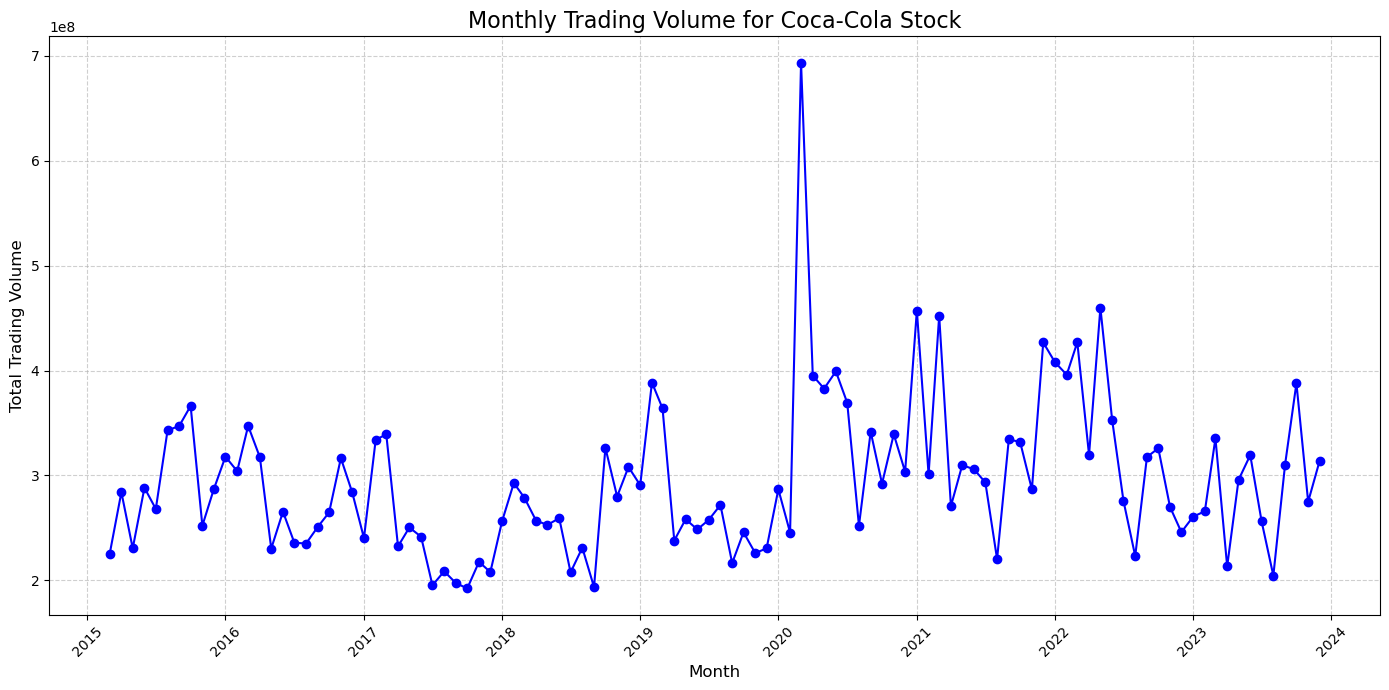

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_volume['YearMonth'], monthly_volume['Volume'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Trading Volume for Coca-Cola Stock', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Trading Volume', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
# Find the months with highest and lowest volumes
highest_volume = monthly_volume.loc[monthly_volume['Volume'].idxmax()]
lowest_volume = monthly_volume.loc[monthly_volume['Volume'].idxmin()]

print(f"Highest Trading Volume: {highest_volume['Volume']} in {highest_volume['YearMonth']}")
print(f"Lowest Trading Volume: {lowest_volume['Volume']} in {lowest_volume['YearMonth']}")


Highest Trading Volume: Ticker         KO
60      693439800 in 60   2020-03-01
Name: YearMonth, dtype: datetime64[ns]
Lowest Trading Volume: Ticker         KO
31      192361800 in 31   2017-10-01
Name: YearMonth, dtype: datetime64[ns]
